# 4 Data Preprocessing & Training

## 4.1 Introduction
In the modeling part, we want to predict real data from sensor data along with the effect of humidity and tempearture. For that purpose, I am going to try different models like linear, random forest and decision trees. After finding the best model for each polution type, I will evaluate the importance of humidity and temperature in data evaluation.

## 4.1 Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

## 4.2 Loading data

In [2]:

df=pd.read_csv('Desktop/Springboard/Capstone 2/wrangledata.csv', parse_dates=[['Date','Time']])

## 4.3 Predicting Real data from Sensor, Humidity and Temperature by Linear Model

First we try linear model for CO, NO2, NOX and non-methanic hydrocarbons.

### 4.3.1. Predicting CO_real data by linear Model

In [3]:
CO=df[['CO_Real', 'Temperature','Absolute Humidity','CO_Sensor']]
CO.dropna(inplace=True)
X_CO=CO[['CO_Sensor', 'Temperature','Absolute Humidity']]
y_CO=CO['CO_Real']


/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
X_train,X_test, y_train,y_test=train_test_split(X_CO, y_CO, test_size=0.2, random_state=42)

In [5]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [6]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [7]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [8]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.780620261531566, 0.785082356591238)

In [9]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(0.47510434033164217, 0.48257497639971814)

The results show high linear trend for predicting real data from sensor data for CO. The test data had same r2 score than train data. Now let's see the NOX real data prediction from sensor data.

### 4.3.2. Predicting NOX_real data by linear Model

In [10]:
NOX=df[['NOX_Real', 'Temperature','Absolute Humidity','NOX_Sensor']]
NOX.dropna(inplace=True)
X_NOX=NOX[['NOX_Sensor', 'Temperature','Absolute Humidity']]
y_NOX=NOX['NOX_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
X_train1,X_test1, y_train1,y_test1=train_test_split(X_NOX, y_NOX, test_size=0.2, random_state=42)


In [12]:

pipe.fit(X_train1, y_train1)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [13]:
y_tr_pred1 = pipe.predict(X_train1)
y_te_pred1 = pipe.predict(X_test1)

In [14]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)


(0.557540675198916, 0.5984587401159507)

In [15]:
mean_absolute_error(y_train1, y_tr_pred1), mean_absolute_error(y_test1, y_te_pred1)

(95.99669221399176, 92.65543376969211)

The linear model seems not good for predicting real data for NOX. Next step would be trying other models like decision trees or ensemble methods.

### 4.3.3. Predicting NO2_real data by linear Model

In [16]:
NO2=df[['NO2_Real', 'Temperature','Absolute Humidity','NO2_Sensor']]
NO2.dropna(inplace=True)
X_NO2=NO2[['NO2_Sensor', 'Temperature','Absolute Humidity']]
y_NO2=NO2['NO2_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
X_train2,X_test2, y_train2,y_test2=train_test_split(X_NO2, y_NO2, test_size=0.2, random_state=42)


In [18]:
pipe.fit(X_train2, y_train2)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [19]:
y_tr_pred2 = pipe.predict(X_train2)
y_te_pred2 = pipe.predict(X_test2)

In [20]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)


(0.3640451998859632, 0.3624940363019371)

No linear relationship observed for NO2 data. 

### 4.3.4. Predicting NMH_real data by linear Model

In [21]:
NMH=df[['Non Metanic Hydrocarbons_Real', 'Temperature','Absolute Humidity','Non Metanic Hydrocarbons_Sensor']]
NMH.dropna(inplace=True)
X_NMH=(NMH[['Non Metanic Hydrocarbons_Sensor', 'Temperature','Absolute Humidity']])
y_NMH=NMH['Non Metanic Hydrocarbons_Real']

/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
X_train3,X_test3, y_train3,y_test3=train_test_split(X_NMH, y_NMH, test_size=0.2, random_state=42)


In [23]:
pipe.fit(X_train3, y_train3)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [24]:
y_tr_pred3 = pipe.predict(X_train3)
y_te_pred3 = pipe.predict(X_test3)

In [25]:
r2_score(y_train3, y_tr_pred3), r2_score(y_test3, y_te_pred3)


(0.7676774070439664, 0.784331010160472)

In [26]:
mean_absolute_error(y_train3, y_tr_pred3), mean_absolute_error(y_test3, y_te_pred3)


(74.21273832311586, 69.46864716248633)

Again high linear correlation observed between real data and sensor data. In the next step, we try decision tree regressor.

## 4.4 Predicting Real data from Sensor, Humidity and Temperature by Decision Tree

### 4.4.1. Predicting CO_real data by Decision Tree Model

In [27]:
pipe_Tree = DecisionTreeRegressor()


In [28]:
param_dict={"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}

In [29]:
clf_GS = GridSearchCV(pipe_Tree, param_grid=param_dict, cv=5)


In [30]:
clf_GS.fit(X_train, y_train)


/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integ

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

In [31]:
clf_GS.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}

In [32]:
clf_GS.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
clf_GS.best_score_

0.7819549386632307

In [34]:
y_tr_pred = clf_GS.predict(X_train)
y_te_pred = clf_GS.predict(X_test)

In [35]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.8351119114591745, 0.7962916794987918)

In [36]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(0.41328781917661833, 0.47460789361879707)

Based on the results, decision tree is slightly better than linear model for predicting CO real data.

### 4.4.2. Predicting NOX_real data by Decision Tree Model

In [37]:
clf_GS.fit(X_train1, y_train1)


/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integ

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

In [38]:
clf_GS.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [39]:
clf_GS.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
clf_GS.best_score_

0.7642234443554166

In [41]:
y_tr_pred1 = clf_GS.predict(X_train1)
y_te_pred1 = clf_GS.predict(X_test1)

In [42]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)


(0.8313774244340634, 0.8002398937991638)

The decision tree model is definitely better than linear model for predicting NOX real data.

### 4.4.3. Predicting NO2_real data by Decision Tree Model

In [43]:
clf_GS.fit(X_train2, y_train2)


/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integ

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

In [44]:
clf_GS.best_params_

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 9}

In [45]:
clf_GS.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
clf_GS.best_score_

0.4926177329430238

In [47]:
y_tr_pred2 = clf_GS.predict(X_train2)
y_te_pred2 = clf_GS.predict(X_test2)

In [48]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)


(0.620607098856111, 0.4960353489296476)

Decision tree model have better r2 score than linear model but still the r2 score is low. So, we will try random forest model in the next step.

### 4.4.4. Predicting NMH_real data by Decision Tree Model

In [49]:
clf_GS.fit(X_train3, y_train3)


/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/mashtari/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integ

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split':

In [50]:
clf_GS.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [51]:
clf_GS.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
clf_GS.best_score_

0.8034229627707541

In [53]:
y_tr_pred3 = clf_GS.predict(X_train3)
y_te_pred3 = clf_GS.predict(X_test3)

In [54]:
r2_score(y_train3, y_tr_pred3), r2_score(y_test3, y_te_pred3)


(0.8435151430992167, 0.7714876285517799)

In [55]:
mean_absolute_error(y_train3, y_tr_pred3), mean_absolute_error(y_test3, y_te_pred3)


(54.73685214748391, 63.83208551609532)

Both linear and decision tree models had the same r2 score but decision tree has slightly less mean absolute error.

## 4.5 Predicting Real data from Sensor, Humidity and Temperature by Random Forest

In [56]:
RF_pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=47)
)
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(copy=True, with_mean=True, with_std=True),
  None]}

In [57]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

### 4.5.1. Predicting CO_real data by Random Forest Model

In [58]:
rf_CO=rf_grid_cv.fit(X_train, y_train)

In [59]:
rf_CO.best_params_

{'randomforestregressor__n_estimators': 1000, 'standardscaler': None}

In [60]:
rf_CO.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [61]:
rf_CO.best_score_

0.805926314155534

In [62]:
y_tr_pred = rf_CO.predict(X_train)
y_te_pred = rf_CO.predict(X_test)

In [63]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)


(0.9739145079099213, 0.8154723406189244)

In [64]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)


(0.15949014468085107, 0.44667985023825724)

The best model to predict CO_real based on r2 score and mean absolute error is random forest model.

### 4.5.2. Predicting NOX_real data by Random Forest Model


In [65]:
rf_NOX=rf_grid_cv.fit(X_train1, y_train1)

In [66]:
rf_NOX.best_params_

{'randomforestregressor__n_estimators': 784,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [67]:
rf_NOX.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=784, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [68]:
rf_NOX.best_score_

0.7978919390219893

In [69]:
y_tr_pred1 = rf_NOX.predict(X_train1)
y_te_pred1 = rf_NOX.predict(X_test1)

In [70]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)


(0.9726427996754827, 0.8265250535383648)

Again, RandomForest model is better than the other models in predicting NOX real data.

### 4.5.3. Predicting NO2_real data by Random Forest Model


In [72]:
rf_NO2=rf_grid_cv.fit(X_train2, y_train2)

In [73]:
rf_NO2.best_params_

{'randomforestregressor__n_estimators': 1000, 'standardscaler': None}

In [74]:
rf_NO2.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler', None),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [75]:
rf_NO2.best_score_

0.5458410936480851

In [76]:
y_tr_pred2 = rf_NO2.predict(X_train2)
y_te_pred2 = rf_NO2.predict(X_test2)

In [77]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)


(0.9397400598825675, 0.5602394905917133)

Random Forest is better than the other models in predicting NO2 real data but the r2 score is still low.

### 4.5.4. Predicting NMH_real data by Random Forest Model


In [78]:
rf_NMH=rf_grid_cv.fit(X_train3, y_train3)

In [79]:
rf_NMH.best_params_

{'randomforestregressor__n_estimators': 233,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [80]:
rf_NMH.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=233, n_jobs=None,
                                       oob_score=False, random_state=47,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [81]:
rf_NMH.best_score_

0.8105832255665698

In [82]:
y_tr_pred3 = rf_NMH.predict(X_train3)
y_te_pred3 = rf_NMH.predict(X_test3)

In [83]:
r2_score(y_train3, y_tr_pred3), r2_score(y_test3, y_te_pred3)


(0.9751404405498616, 0.774626637449565)

In [84]:
mean_absolute_error(y_train3, y_tr_pred3), mean_absolute_error(y_test3, y_te_pred3)


(20.01164670060594, 62.65014225780006)

Based on the results, random forest is a little bit better than decision tree in predicting NMH data.

Overall, we use random forest as the best model.

## 4.6.Feature Importance using Random Forest

### 4.6.1. Feature importance for CO_real data

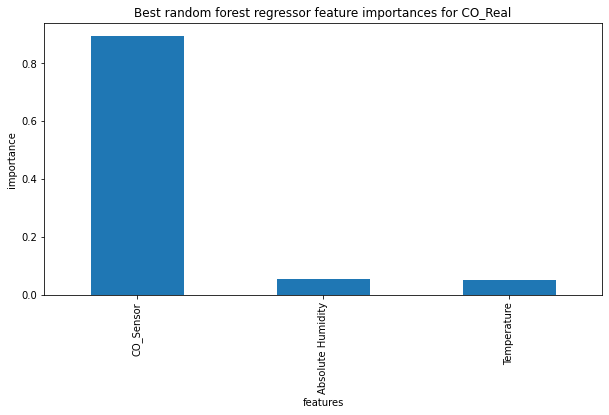

In [85]:

plt.subplots(figsize=(10, 5))
imps = rf_CO.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances for CO_Real');

It seems humidity and temperature also cantributed alittle bit in predicting CO_real data.

### 4.6.2. Feature importance for NOX_real data

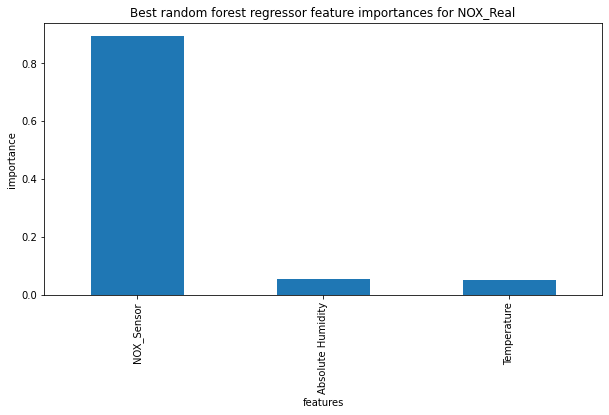

In [86]:

plt.subplots(figsize=(10, 5))
imps = rf_NOX.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train1.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances for NOX_Real');

It looks like temperature and humidity affect alittle bit prediction of NOX_real data.

### 4.6.3. Feature importance for NO2_real data

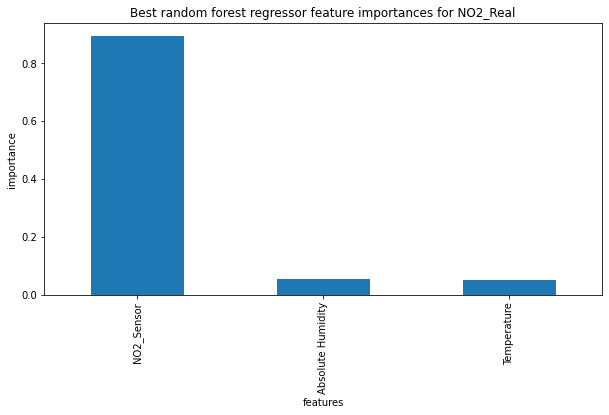

In [87]:

plt.subplots(figsize=(10, 5))
imps = rf_NO2.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train2.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances for NO2_Real');

It looks like temperature and humidity affect alittle bit prediction of NO2_real data.

### 4.6.4. Feature importance for NMH_real data

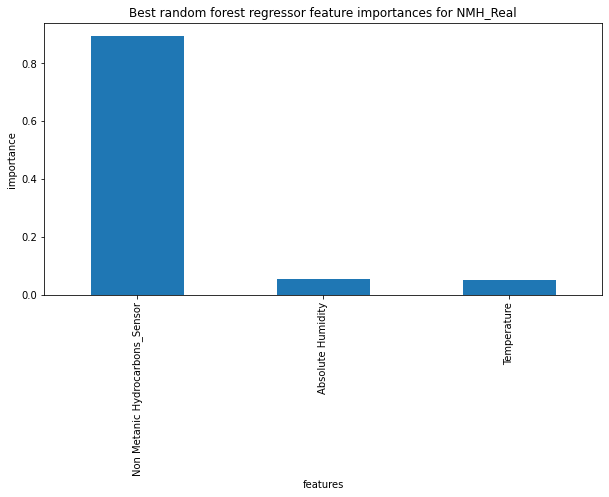

In [89]:
plt.subplots(figsize=(10, 5))
imps = rf_NMH.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train3.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances for NMH_Real');

It looks like temperature and humidity affect alittle bit prediction of NMH_real data.

### 4.7. Save best model object from pipeline¶


In [95]:
from sklearn import __version__ as sklearn_version
import datetime
import os
import pickle


best_model_CO = rf_CO.best_estimator_
best_model_NOX = rf_NOX.best_estimator_
best_model_NO2 = rf_NO2.best_estimator_
best_model_NMH = rf_NMH.best_estimator_

#best_model.version = __version__
best_model_CO.pandas_version = pd.__version__
best_model_NOX.pandas_version = pd.__version__
best_model_NO2.pandas_version = pd.__version__
best_model_NMH.pandas_version = pd.__version__

best_model_CO.numpy_version = np.__version__
best_model_NOX.numpy_version = np.__version__
best_model_NO2.numpy_version = np.__version__
best_model_NMH.numpy_version = np.__version__

best_model_CO.sklearn_version = sklearn_version
best_model_NOX.sklearn_version = sklearn_version
best_model_NO2.sklearn_version = sklearn_version
best_model_NMH.sklearn_version = sklearn_version

best_model_CO.X_columns = [col for col in X_train.columns]
best_model_NOX.X_columns = [col for col in X_train1.columns]
best_model_NO2.X_columns = [col for col in X_train2.columns]
best_model_NMH.X_columns = [col for col in X_train3.columns]

best_model_CO.build_datetime = datetime.datetime.now()
best_model_NOX.build_datetime = datetime.datetime.now()
best_model_NO2.build_datetime = datetime.datetime.now()
best_model_NMH.build_datetime = datetime.datetime.now()

    
modelpath = 'Desktop/Springboard/Capstone2'
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
Polution_path = os.path.join(modelpath, 'Polution_model.pkl')
if not os.path.exists(Polution_path):
    with open(Polution_path, 'wb') as f:
        pickle.dump(best_model_CO, f)
        pickle.dump(best_model_NOx, f)
        pickle.dump(best_model_NO2, f)
        pickle.dump(best_model_NMH, f)


## 4.8. Summary

The data modeling showed that random forest model had the better performance than linear regression and decision tree for modeling of all polution types. The feature importance showed that the sum of humidity and temperature had 10% effect in predicting real data from the sensor data. In the next part, I will investigate more the varibles effect on real data prediction.